## Astronomy 534 "Extragalactic Universe" (Winter 2025)

## Homework 2

#### available: Friday January 31

#### due: Friday February 7

Please upload your solution to Canvas as Jupyter Notebook (`.pynb` format). It should contain all your code and plots. You can digitize your hand-written solution and include it as images (`.png` format) if needed. Please make sure it is clear to read.

### Criteria for success

* Solution is correct, as a functional dependence and numerical value (50% of points).

* Intermediate steps of derivations are clearly shown, blocks of code are documented with markdown cells that explain what the code does (30% of points).

* Plots are _paper quality_ (20% of points): with clear axis labels, font, legends for lines. The range of $x$ and $y$ axes should be appropriate for plotted values, without large blocks of empty space.

You may discuss how to approach the problems with other students and the instructor, but all code, derivations, and write-up must be your own.

### Background

Interactions of particles with radiation in the early universe set the abundances of all species we observe now. As the universe expanded, the wavelengths of photons redshifted and their average energy (characterized by temperature) decreased. When the interaction rate $\Gamma(t_{\rm f})$ fell below the expansion rate $H(t_{\rm f})$, particles effectively decoupled from radiation and their abundances _froze_ at that epoch $t_{\rm f}$.

### Learning goals

* Understand the origin of current abundances of stable particles.


* Evaluate potential contribution of heavy neutrinos to the dark matter density.


* Be able to calculate the current abundance of particles with a known interaction cross-section.


* Evaluate constraints on the unknown interaction cross-section for particles with a given observed abundance.

### Task

__Problem 1.__ (20 points)

Using the expression for the number density of ultrarelativistic Bose-Einstein species, calculate the number density of CMB photons now. Use the latest Planck 2018 cosmological parameters as needed. Then calculate the ratio $\eta = n_b/n_\gamma$ of the number density of baryons to the number density of photons now. Keep the explicit dependence on any involved cosmological parameters.


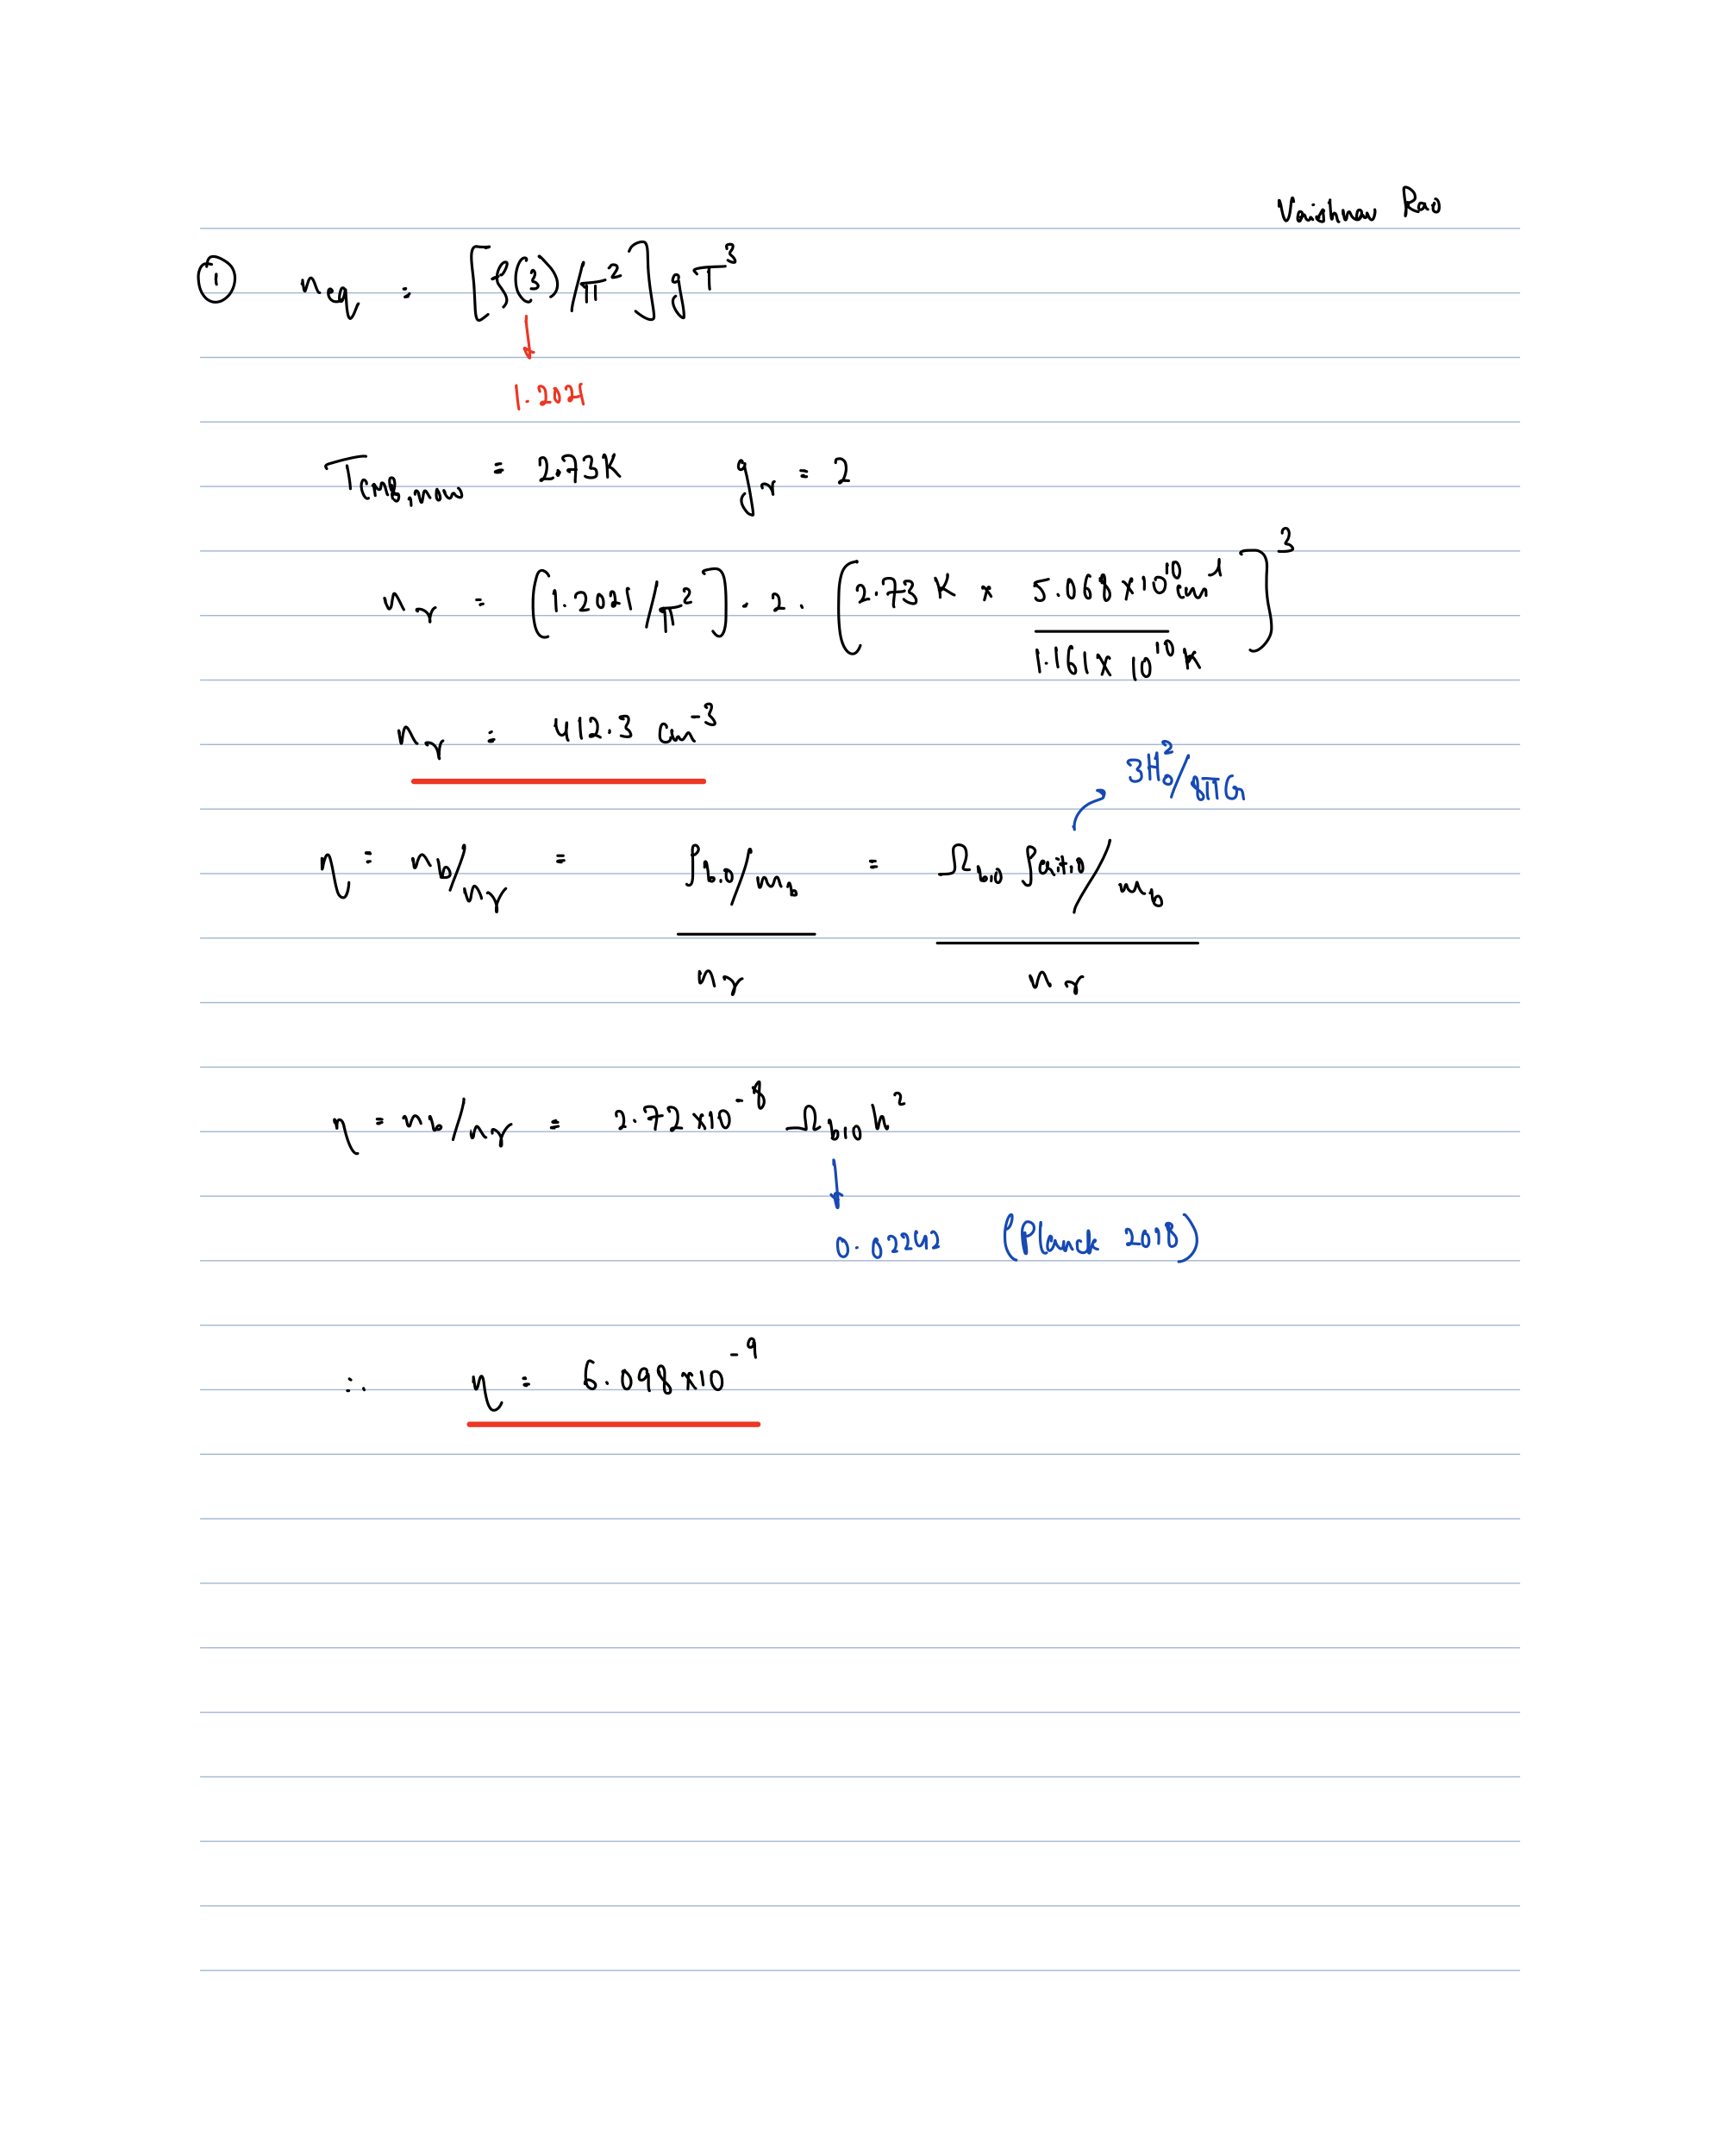

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u

In [5]:
(1.2021/np.pi**2)*2 *(2.73*5.068/1.161)**3

412.26071104118193


__Problem 2.__ (40 points)

Calculate the number density of neutrinos now. It may be easiest to do by comparing their entropy to that of photons, but remember that photons are bosons and neutrinos are fermions. Then calculate the present density parameter of neutrinos $\Omega_{\nu 0}$ as function of their mass $m_\nu$, in the regime where $m_\nu \sim 4$ eV. Remember to include all species of neutrino, and assume that all neutrino species have approximately the same mass. What would you conclude about the origin of dark matter if $m_\nu = 4$ eV?



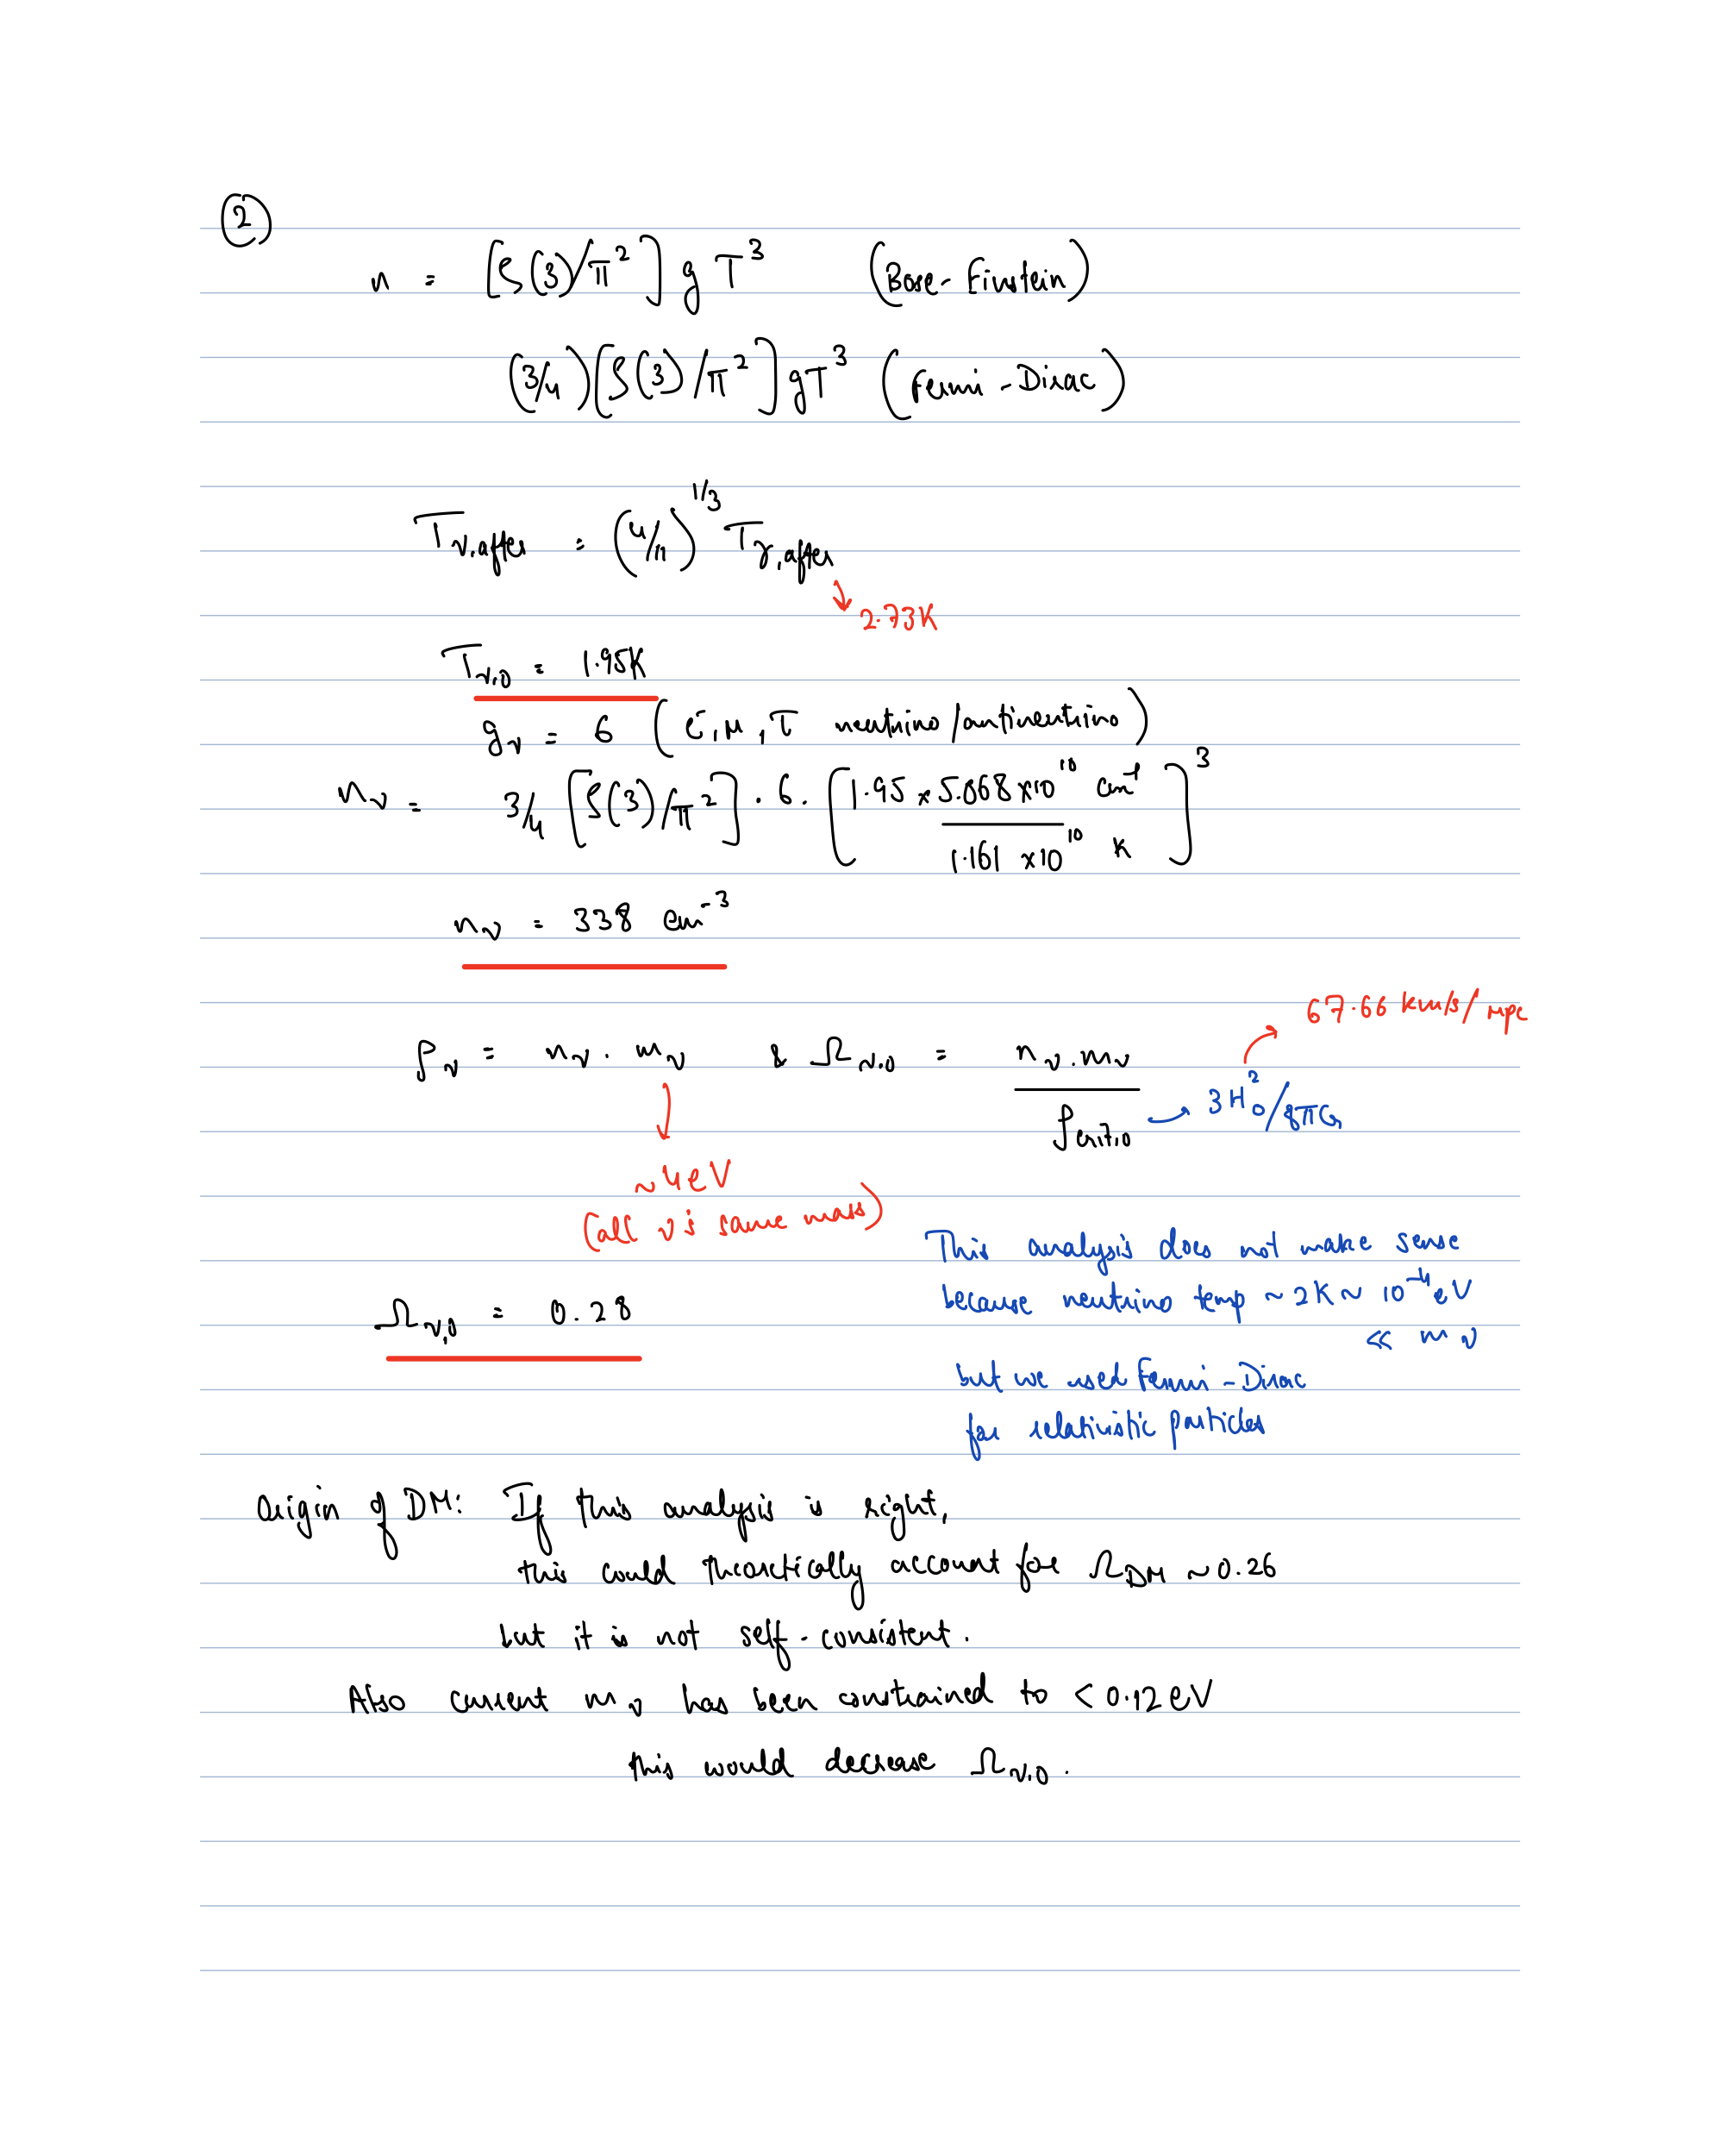

In [8]:
n = 338 * u.cm**-3
m = 4 * u.eV / const.c**2
H0 = 67.66 * u.km / u.s / u.Mpc
G = const.G

rho_c = 3 * H0**2 / (8 * np.pi * G)

rho_neutrinos = n * m

Omega_neutrinos = (rho_neutrinos / rho_c).decompose()

print(Omega_neutrinos)

0.2802896825204229



__Problem 3.__ (40 points)

Consider the rate equation for the number density of particles that have only creation and annihilation reactions (equation 3.164 in MBW) and adopt the condition that freeze-out occurs when $\Gamma(t) = H(t)$. Estimate the value of the cross-section, $\langle\sigma v\rangle$, of heavy WIMP particles with $m \approx 100$ GeV that is required to produce the observed density of dark matter $\Omega_{\rm dm} \approx 0.26$. It is called a _thermal cross-section_ and you may hear it referenced in talks on dark matter detection experiments. You may refer to Figure 3.5 in MBW to estimate the cosmic time of the freeze-out.

__Bonus:__ Solve equation MBW 3.164 numerically for some appropriate choice of parameters and reproduce Figure 3.5.



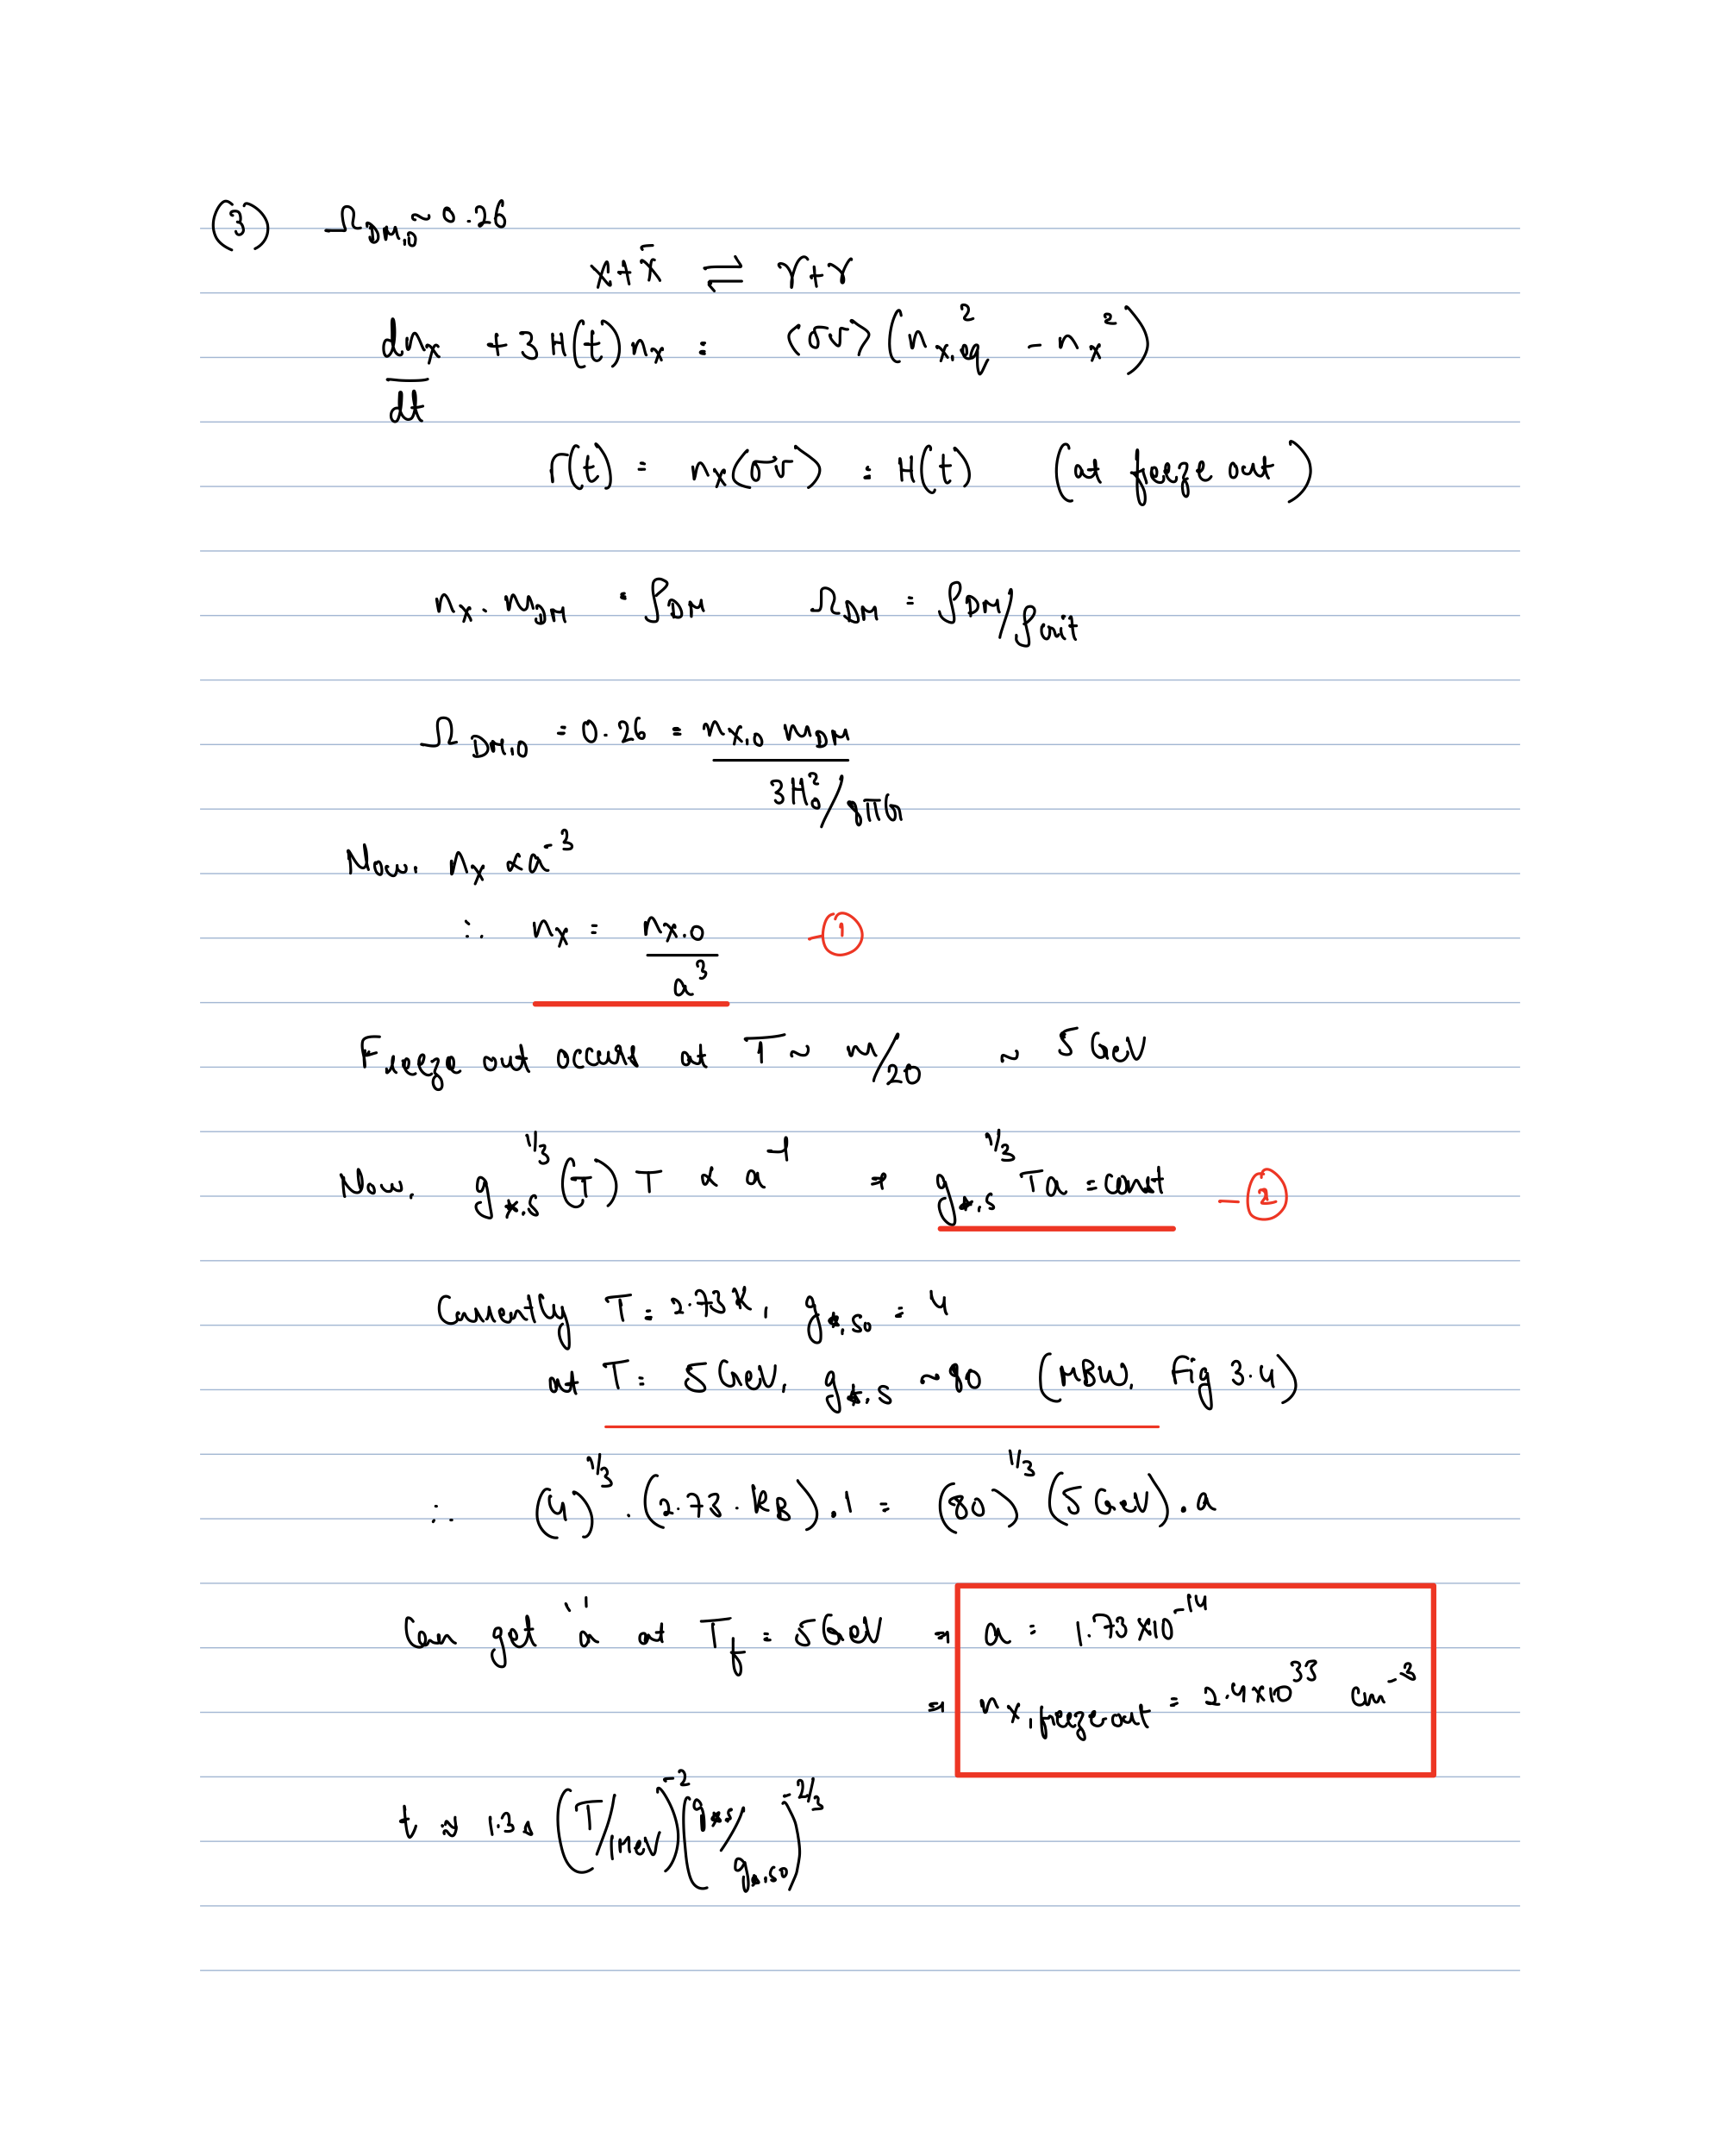
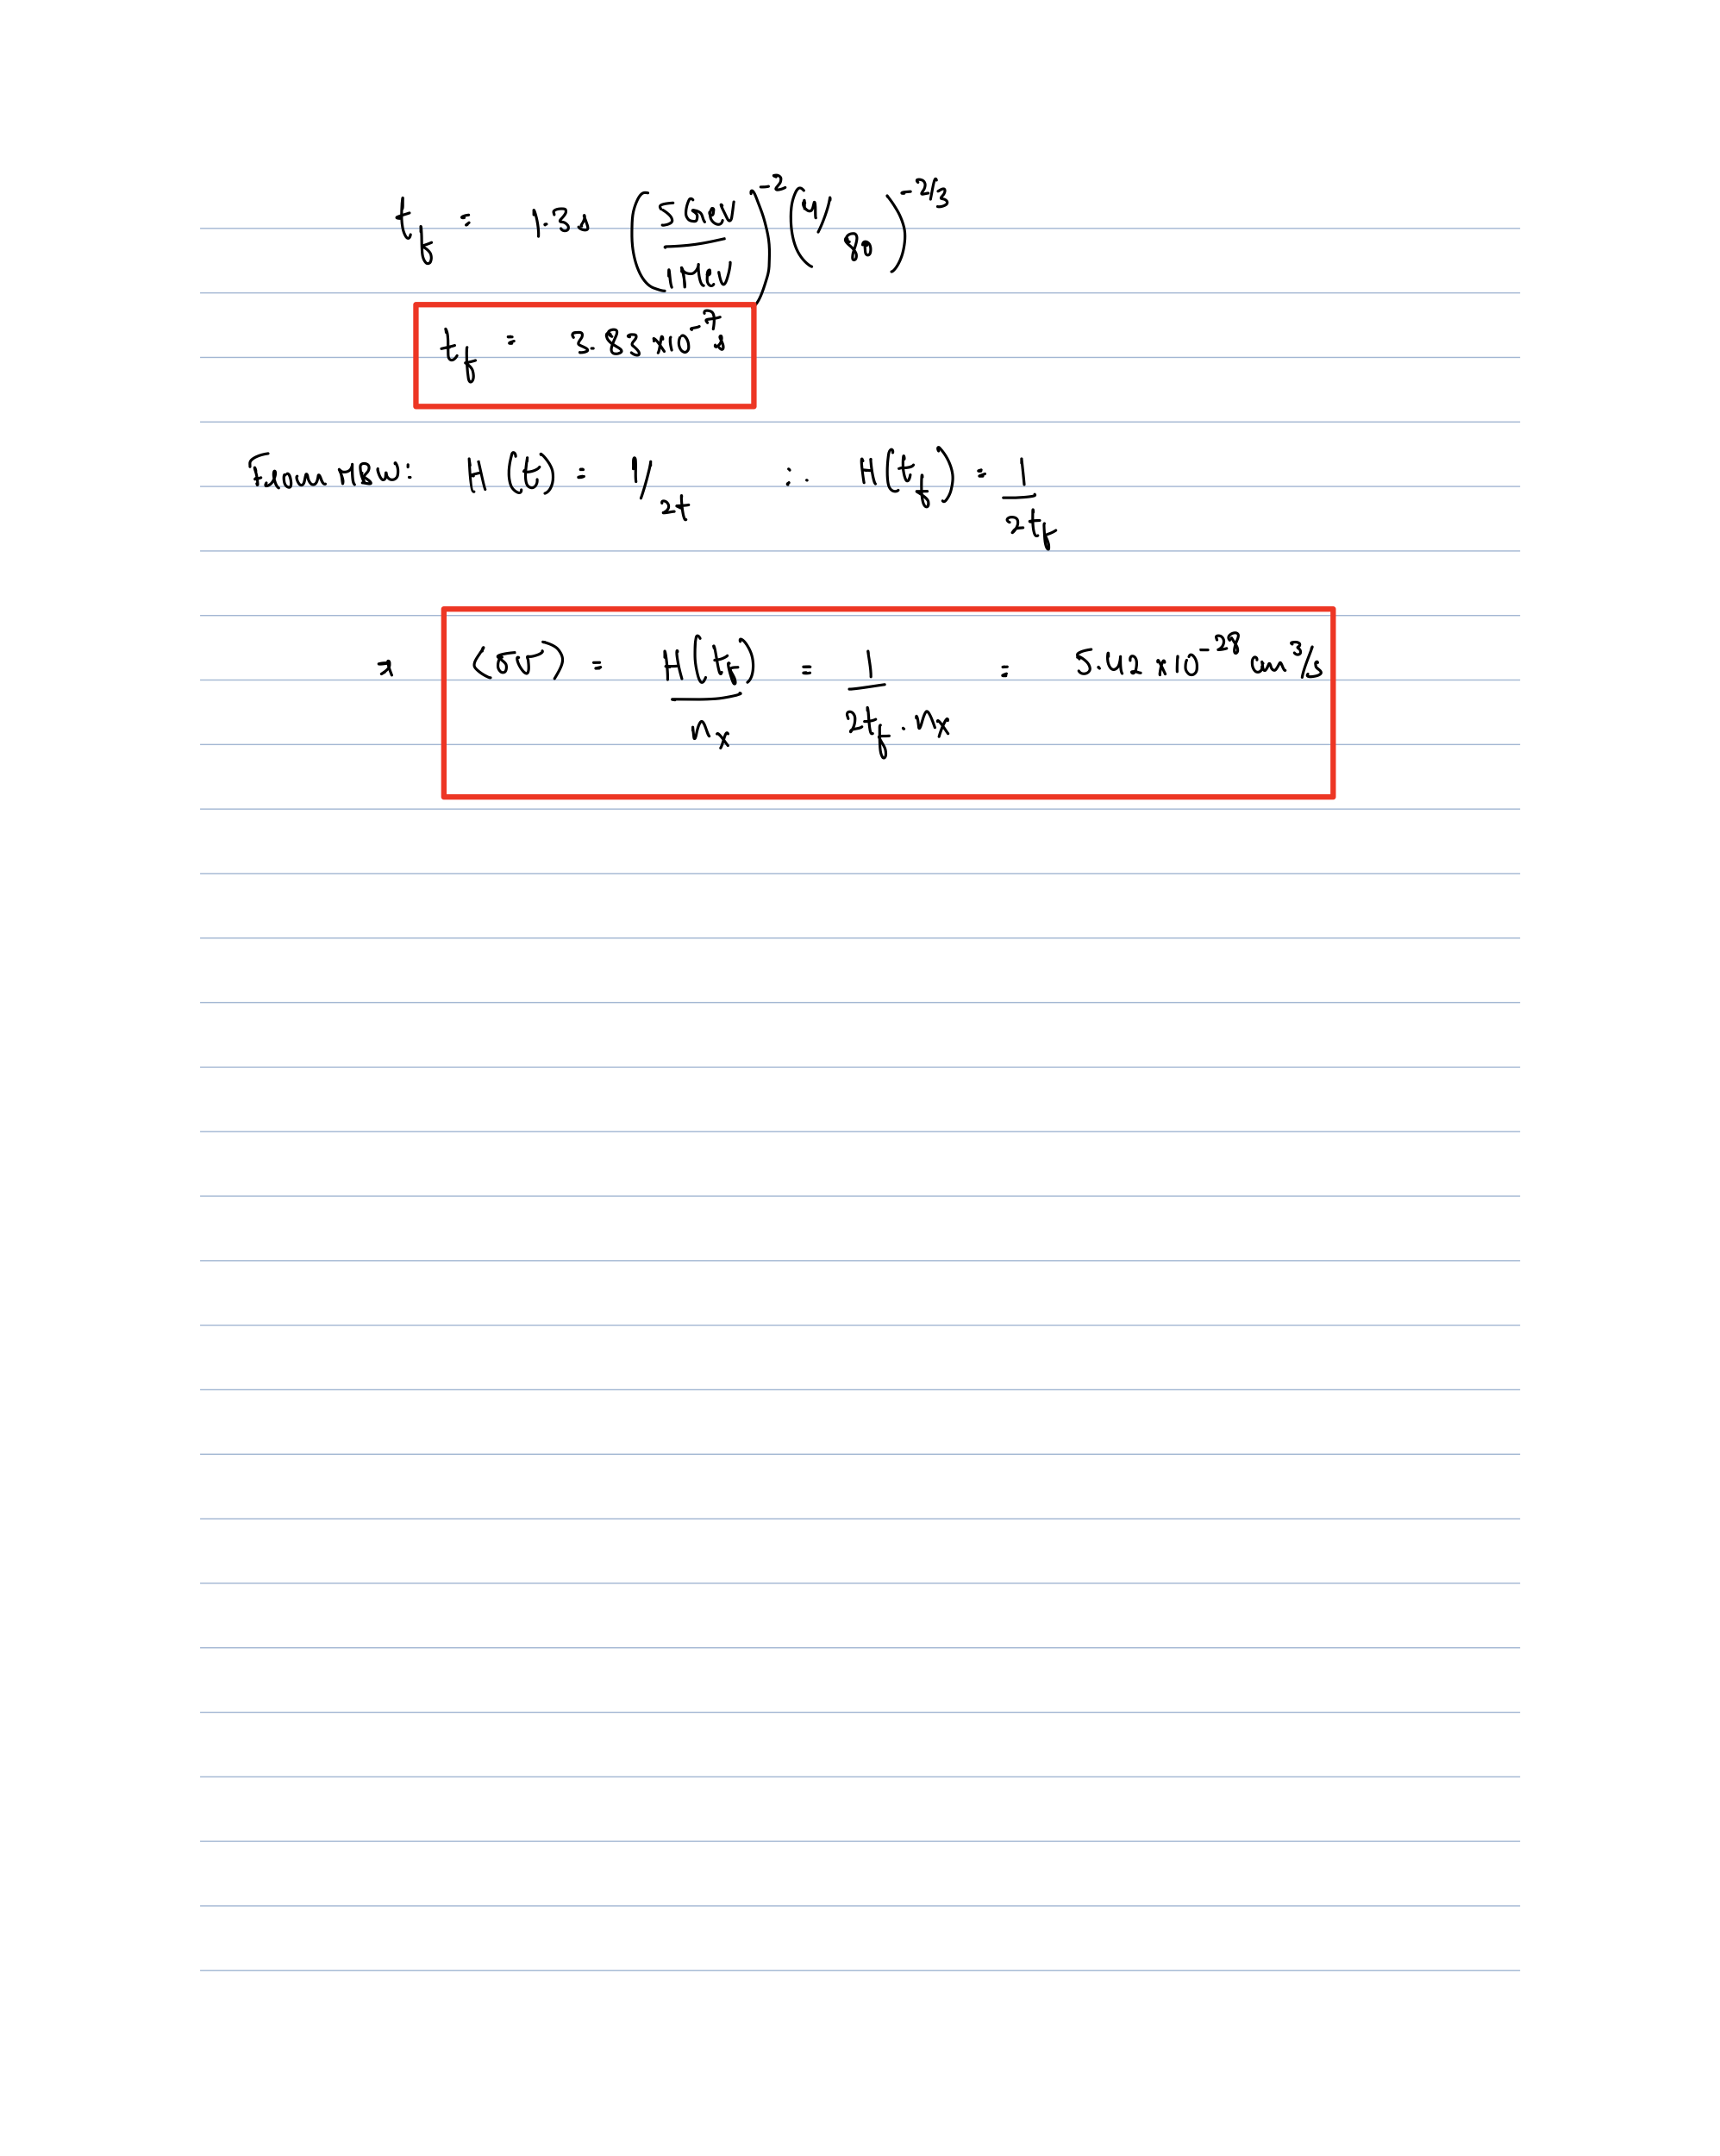

In [12]:
#Present day energy density of dark matter
Omega_DM0 = 0.26

#Dark matter mass 
m_DM = 100 * u.GeV / const.c**2

#Present day number density of dark matter
n_DM0 = (Omega_DM0 * rho_c / m_DM).decompose()

#Freeze out temperature of dark matter
T_f = 5 * u.GeV/ const.k_B

#Scale factor at freeze out from entropy conservation:
a_f = (4/80)**(1/3)* (2.73*u.K/T_f).decompose()

#Number density of dark matter at freeze out:
n_f = n_DM0 / a_f**3

print('Scale factor at freeze out:', a_f)
print('Number density of dark matter at freeze out:', n_f.cgs.value)


Scale factor at freeze out: 1.73336038359253e-14
Number density of dark matter at freeze out: 2.4081100414805527e+33


In [13]:
#Time at freeze out:
t_f = 1.3 *(5e9/1e6)**(-2)*(4/80)**(-2/3) * u.s

print('Time at freeze out:', t_f.to(u.s))

Time at freeze out: 3.831392758586002e-07 s


In [15]:
#Cross section for dark matter annihilation:
sigma_v = 1/(2*t_f*n_f)

print('Cross section for dark matter annihilation:', sigma_v.cgs)

Cross section for dark matter annihilation: 5.419222739150399e-28 cm3 / s
